За даними акселерометра з мобільного телефону потрібно класифікувати, якою діяльністю займається людина: йде, стоїть, біжить чи йде по сходах.
Використайте алгоритми SVM та випадковий ліс з бібліотеки scikit-learn. Як характеристики можете брати показники з акселерометра, проте щоб покращити результати роботи алгоритмів, спочатку можна підготувати наш датасет і розрахувати часові ознаки (time domain features). 
Порівняйте результати роботи обох алгоритмів на різних фічах та різні моделі між собою. Використайте метод classification report для порівняння.
Порівняння моделей на основі однієї метрики(такої як Accuracy)- не приймається.

In [19]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [9]:
folder = 'data'
data = pd.DataFrame()
for activity in os.listdir(folder):
    activity_path = os.path.join(folder, activity)
    if not os.path.isdir(activity_path):
        continue
    
    for file_name in os.listdir(activity_path):
        file_path = os.path.join(activity_path, file_name)
        if not file_name.endswith('.csv'):
            continue
        
        df = pd.read_csv(file_path)
        df['activity'] = activity
        data = pd.concat([data, df], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,0.512359,-8.437167,24.171860,walking
1,11.291056,15.964537,6.066907,running
2,13.728353,27.164612,6.009446,running
3,2.652776,-16.730682,-4.783615,running
4,-6.631939,1.723825,1.359907,walking


In [10]:
data.shape

(193860, 4)

In [11]:
data[data.isna()].count()

accelerometer_X    0
accelerometer_Y    0
accelerometer_Z    0
activity           0
dtype: int64

In [12]:
X = data[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']]
X.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,0.512359,-8.437167,24.171860
1,11.291056,15.964537,6.066907
2,13.728353,27.164612,6.009446
3,2.652776,-16.730682,-4.783615
4,-6.631939,1.723825,1.359907


In [13]:
Y = data['activity']
Y.head()

0    walking
1    running
2    running
3    running
4    walking
Name: activity, dtype: object

In [14]:
# Time domain features
X['mean'] = X.mean(axis=1)
X['std'] = X.std(axis=1)
X['max'] = X.max(axis=1)
X['min'] = X.min(axis=1)
X

,accelerometer_X,accelerometer_Y,accelerometer_Z,mean,std,max,min
0,0.512359,-8.437167,24.171860,5.415684,13.756674,24.171860,-8.437167
1,11.291056,15.964537,6.066907,11.107500,4.042775,15.964537,4.042775
2,13.728353,27.164612,6.009446,15.634137,8.741063,27.164612,6.009446
3,2.652776,-16.730682,-4.783615,-6.287174,7.984365,7.984365,-16.730682
4,-6.631939,1.723825,1.359907,-1.182736,3.856032,3.856032,-6.631939
...,...,...,...,...,...,...,...
193855,4.491523,-7.393295,-1.589750,-1.497174,4.852398,4.852398,-7.393295
193856,-6.924031,5.224149,-6.751649,-2.817177,5.686512,5.686512,-6.924031
193857,0.378284,-0.019154,9.749189,3.369440,4.514081,9.749189,-0.019154
193858,-0.316035,6.536171,4.367024,3.529053,2.859467,6.536171,-0.316035


In [11]:
# Створення та навчання моделей
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = svm.SVC()
clf.fit(X_train, y_train)


SVC()

In [12]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [13]:

svm_predictions = clf.predict(X_test)
rfc_predictions = rfc.predict(X_test)

In [14]:
# Оцінка результатів
print("SVM classification report:")
print(classification_report(y_test, svm_predictions))

print("\nRandom Forest classification report:")
print(classification_report(y_test, rfc_predictions))

SVM classification report:
              precision    recall  f1-score   support

        idle       0.96      0.99      0.97      6079
     running       0.93      0.90      0.92     20557
      stairs       1.00      0.00      0.01       962
     walking       0.80      0.91      0.85     11174

    accuracy                           0.90     38772
   macro avg       0.93      0.70      0.69     38772
weighted avg       0.90      0.90      0.89     38772


Random Forest classification report:
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6079
     running       1.00      1.00      1.00     20557
      stairs       1.00      1.00      1.00       962
     walking       1.00      1.00      1.00     11174

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772



In [15]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
rfc_accuracy = accuracy_score(y_test, rfc_predictions)

print("Accuracy (SVM):")
print(svm_accuracy)

print("\nAccuracy (Random Forest):")
print(rfc_accuracy)

Accuracy (SVM):
0.8963685133601568

Accuracy (Random Forest):
0.9997936655318271


## Result

Час тренування SVM суттєво більше за час Random Forest, в той час як Random Forest дає бвльшу точність прогнозування. В звіті класифікацій Random Forest дає ідеальний результат, SVM показує меншу точність, особливо для класу "stairs". Це свідчить про те, що у цьому конкретному випадку Random Forest може бути кращим вибором для класифікації.

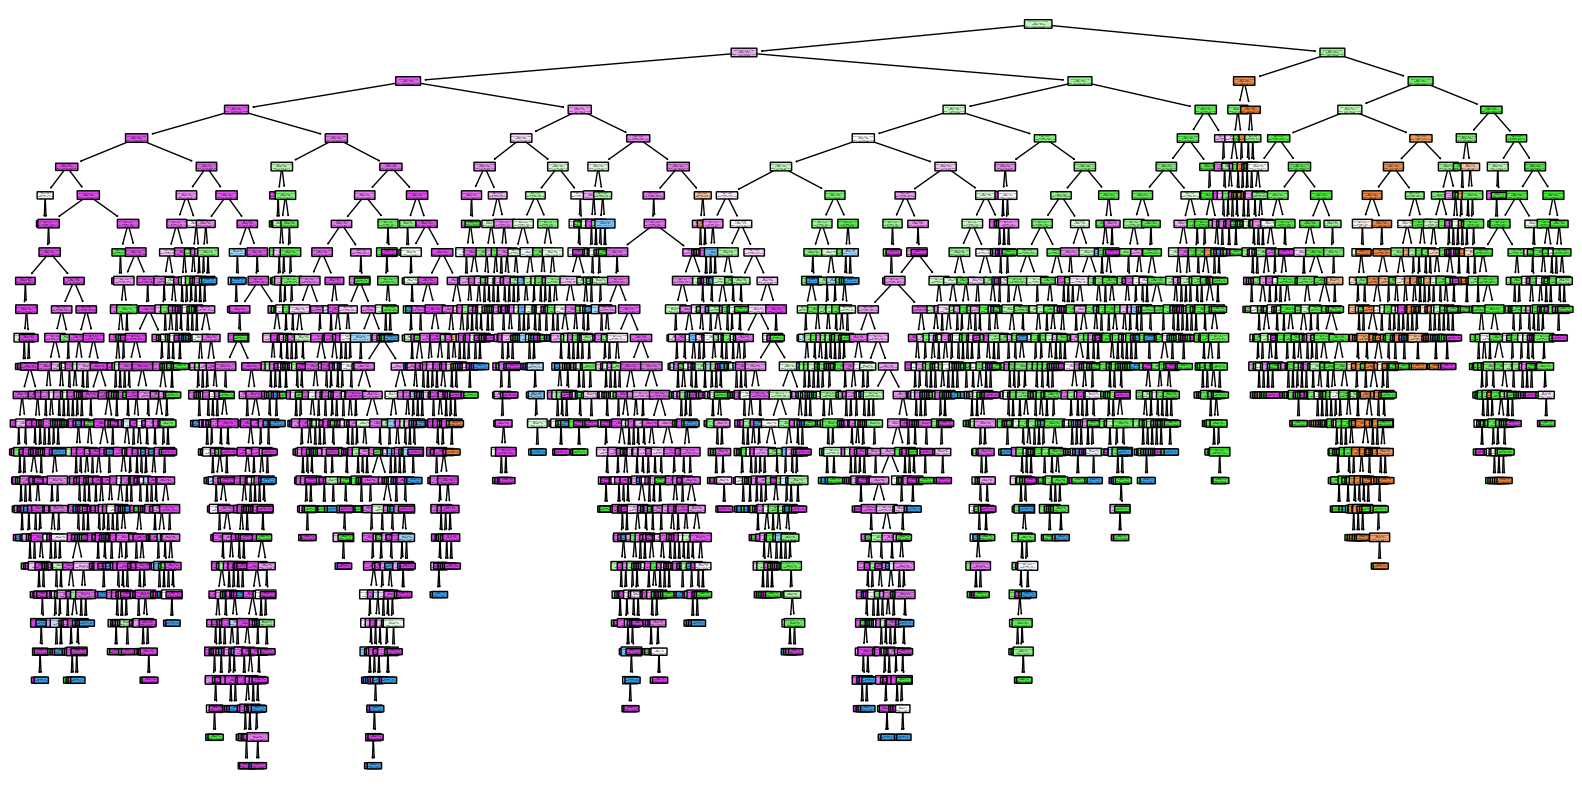

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, 
          feature_names=X.columns,  
          class_names=dt_classifier.classes_,  
          filled=True, 
          rounded=True)
plt.show()